# ACL 
We download the entire ACL database bib file. We then manually add entries from the most recent issue as this one is not in the database.

In [121]:
import pandas as pd
import numpy as np

In [12]:
# https://bibtexparser.readthedocs.io/en/master/index.html
pip install bibtexparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bibtexparser: filename=bibtexparser-1.2.0-py3-none-any.whl size=36713 sha256=f1d07ae8b9825dec7f318d7f9d323e3021ca6140bc8dee039b95b32e8353a120
  Stored in directory: /Users/kylehamilton/Library/Caches/pip/wheels/3e/13/1d/09c37a40f39ddd7b226719a797f1896a5b95d730de27e7a505
Successfully built bibtexparser
Note: you may need to restart the kernel to use updated packages.


In [20]:
# with open("../../ACL/anthology+abstracts.bib") as bibtex_file:
#     bib_database = bibtexparser.load(bibtex_file)
    
# df = pd.DataFrame(bib_database.entries)
# # selection = df[['doi', 'number']]
# # selection.to_csv('temp.csv', index=False)

In [19]:
import bibtexparser
from bibtexparser.bparser import BibTexParser

with open('../../ACL/anthology+abstracts.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()
    
parser = BibTexParser(common_strings=True)
parser.ignore_nonstandard_types = True
parser.homogenise_fields = True

bib_database = bibtexparser.loads(bibtex_str, parser)

In [99]:
df = pd.DataFrame(bib_database.entries)

### Add 2022 entries

In [100]:
acl22 = pd.read_csv('../../ACL/ACL-2022.csv')

In [101]:
acl22.columns

Index(['url', 'publisher', 'address', 'year', 'month', 'editor', 'title',
       'ENTRYTYPE', 'ID', 'pages', 'booktitle', 'author', 'abstract', 'doi',
       'volume', 'journal', 'language', 'number', 'isbn', 'note'],
      dtype='object')

In [102]:
df = pd.concat([df,acl22])

In [103]:
df.to_csv('../../ACL/anthology+abstracts.csv',index=None)

# START HERE

In [214]:
df = pd.read_csv('../../ACL/anthology+abstracts.csv')

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (14,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [215]:
len(df)

74585

In [216]:
df.columns

Index(['url', 'publisher', 'address', 'year', 'month', 'editor', 'title',
       'ENTRYTYPE', 'ID', 'pages', 'booktitle', 'author', 'abstract', 'doi',
       'volume', 'journal', 'language', 'number', 'isbn', 'note'],
      dtype='object')

In [217]:
df.dtypes

url          object
publisher    object
address      object
year          int64
month        object
editor       object
title        object
ENTRYTYPE    object
ID           object
pages        object
booktitle    object
author       object
abstract     object
doi          object
volume       object
journal      object
language     object
number       object
isbn         object
note         object
dtype: object

In [218]:
df.journal.unique()

array([nan,
       'Transactions of the Association for Computational Linguistics',
       'Computational Linguistics',
       'American Journal of Computational Linguistics'], dtype=object)

In [219]:
df.journal.value_counts()

Computational Linguistics                                        1733
Transactions of the Association for Computational Linguistics     444
American Journal of Computational Linguistics                     368
Name: journal, dtype: int64

In [220]:
df.ENTRYTYPE.value_counts()

inproceedings    69990
article           2538
proceedings       2050
Name: ENTRYTYPE, dtype: int64

In [221]:
txt = "Deep Learning for Text Style Transfer"
df[df.title.str.contains(txt)]

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,booktitle,author,abstract,doi,volume,journal,language,number,isbn,note
74582,https://direct.mit.edu/coli/article/48/1/155/1...,NaN,NaN,2022,March,NaN,Deep Learning for Text Style Transfer: A Survey,NaN,NaN,155-205,NaN,"Di Jin, Zhijing Jin, Zhiting Hu, Olga Vechtomo...",Text style transfer is an important task in na...,https://doi.org/10.1162/coli_a_00426,48(1),Computational Linguistics,NaN,NaN,NaN,NaN


## Filter out entries older than 5 years

In [222]:
df['year'] = df['year'].astype(int)
df = df[df['year']>2016]

In [223]:
len(df)

27009

In [224]:
len(df[df['year']>2018])

19022

In [225]:
len(df[(df['journal'].isna())])

26574

In [226]:
df.journal.value_counts()

Transactions of the Association for Computational Linguistics    281
Computational Linguistics                                        154
Name: journal, dtype: int64

In [227]:
len(df[df['ENTRYTYPE']=='inproceedings'])

25916

## Filter out proceedings as these are collections of already included articles

In [228]:
df = df[df['ENTRYTYPE']!='proceedings']

In [229]:
len(df)

26351

In [230]:
len(df[(df['abstract'].isna())])

3442

## Filter out survey papers using the title field

In [231]:
surveys = df[df['title'].str.contains('survey',case=False)]

In [232]:
len(surveys)

84

In [233]:
surveys.to_csv('../../ACL/surveys.csv',index=None)

In [234]:
df = df[~df['title'].str.contains('survey',case=False)]

# Filter by keywords using abstract and title

The following keywords were used to search the Scopus database. We will perform the same search for ACL.
```
TITLE-ABS-KEY ( ( ( "sub-symbolic"  OR  "machine learning"  OR  "deep learning" )  AND  ( "symbolic"  OR  "reasoning"  OR  "logic" ) )  OR  ( "neuro-symbolic"  OR  "neural-symbolic"  OR  "neuro symbolic"  OR  "neural symbolic"  OR  "neurosymbolic" ) ) ```

In [235]:
import re

In [236]:
df.columns

Index(['url', 'publisher', 'address', 'year', 'month', 'editor', 'title',
       'ENTRYTYPE', 'ID', 'pages', 'booktitle', 'author', 'abstract', 'doi',
       'volume', 'journal', 'language', 'number', 'isbn', 'note'],
      dtype='object')

In [237]:
df['title_abstract'] = df[['title', 'abstract']].astype(str).agg(' '.join, axis=1)

In [250]:
pattern1 = 'sub-symbolic|machine\slearning|deep\slearning'
pattern2 = 'symbolic|reasoning|logic'
pattern3 = 'neuro-symbolic|neural-symbolic|neuro\ssymbolic|neural\ssymbolic|neurosymbolic'

In [239]:
df = df[((df['title_abstract'].str.contains(pattern1, flags=re.IGNORECASE, regex=True))
        &(df['title_abstract'].str.contains(pattern2, flags=re.IGNORECASE, regex=True)))
        |(df['title_abstract'].str.contains(pattern3, flags=re.IGNORECASE, regex=True))
  ]

# Save to file

In [243]:
df = df[['ENTRYTYPE','title','abstract','url', 'doi', 'journal','year']]

In [244]:
df['year'].value_counts()

2020    50
2021    43
2019    38
2018    22
2017    22
Name: year, dtype: int64

In [245]:
df.to_csv('../../ACL/filtered_results.csv',index=None)

# NOTE
This search strategy returns results like: 

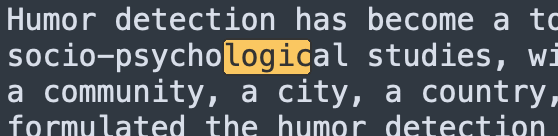

So off the bat, some of the results will not be relevant to our review